# 1. Data Preprocessing

In [24]:
!pip install scipy --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 31.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


Adjacency Matrix Shape: (4039, 4039)
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


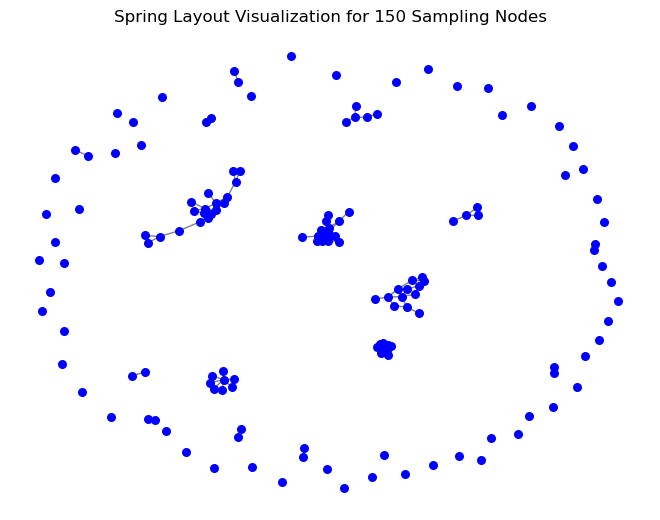

In [1]:
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
edge_list_file = os.path.join(os.getcwd(), "SNAP_facebook/facebook_combined.txt")  # Path to your dataset
graph = nx.read_edgelist(edge_list_file, nodetype=int)

# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).toarray()

# Save or display the matrix
print("Adjacency Matrix Shape:", adj_matrix.shape)
print(adj_matrix)  # Or save to a file if needed

# Visualization of sampled nodes
sampled_nodes = random.sample(list(graph.nodes), 150)
sampled_subgraph = graph.subgraph(sampled_nodes)

# Using spring layout
pos = nx.spring_layout(sampled_subgraph, seed=42)  # Seed for consistent layout
nx.draw(
    sampled_subgraph,
    pos,
    with_labels=False,
    node_size=30,
    node_color='blue',
    edge_color='gray'
)
plt.title("Spring Layout Visualization for 150 Sampling Nodes")
plt.show()

## 2. Classic Methods

### 2.1 Method 1: Eigenvector Centrality using Power Method

In [2]:
# find the eigenvector centrality using power method
def power_method(A, max_iter=100, tol=1e-6):
    n = A.shape[0]
    # Initialize eigenvector
    x = np.ones(n) / np.sqrt(n)
    
    for _ in range(max_iter):
        # Store previous eigenvector for convergence check
        x_old = x.copy()
        # Power iteration
        x = A @ x
        # Normalize
        x = x / np.linalg.norm(x)
        # Check convergence
        if np.allclose(x, x_old, rtol=tol):
            break
    
    return x

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = power_method(adj_matrix)

In [31]:
# Find top 10 nodes with highest eigenvector centrality
top_nodes_eigenvector_cen = np.argsort(eigenvector_centrality)[-10:]

# Print results for top 10 nodes
print("Top 10 nodes by eigenvector centrality:")
for node in reversed(top_nodes_eigenvector_cen):
    print(f"Node {node}: {eigenvector_centrality[node]:.6f}")


Top 10 nodes by eigenvector centrality:
Node 352: 0.095406
Node 2145: 0.086983
Node 3146: 0.086053
Node 3169: 0.085173
Node 3338: 0.084279
Node 3106: 0.084193
Node 3157: 0.084156
Node 3058: 0.084136
Node 3096: 0.083672
Node 3002: 0.083533


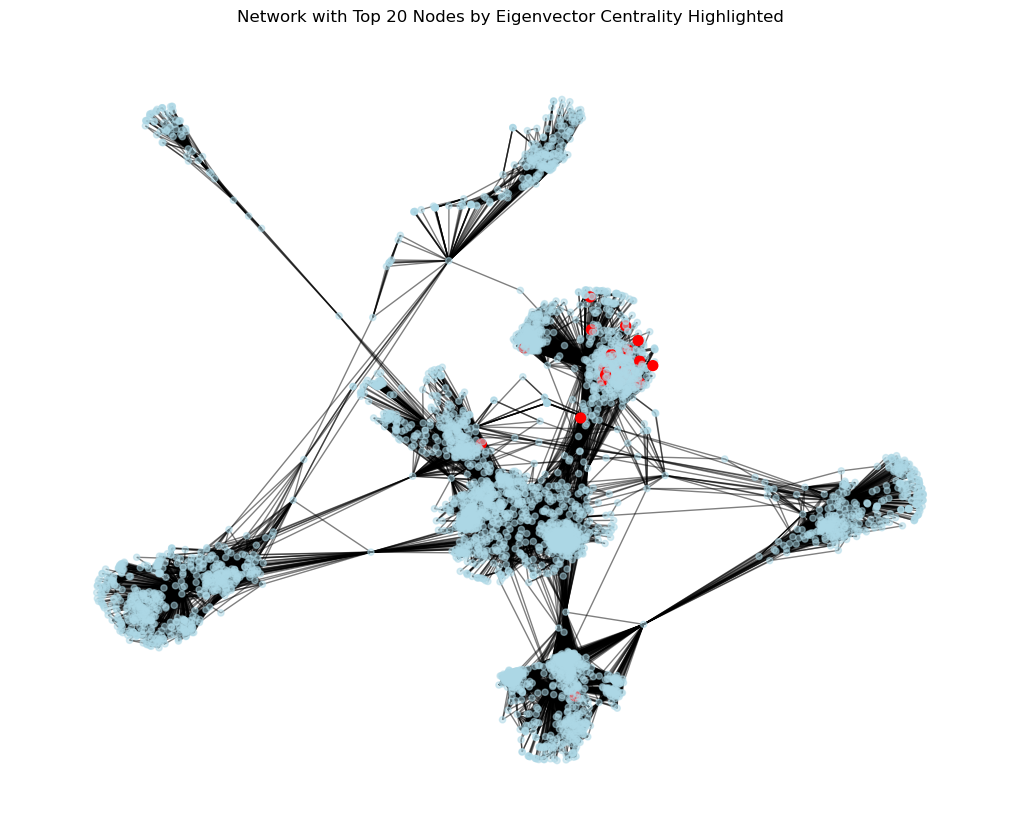

In [28]:
# Create visualization
top_nodes_viz = np.argsort(eigenvector_centrality)[-20:]

plt.figure(figsize=(10,8))
nx.draw(graph, pos,
        node_color=['red' if node in top_nodes_viz else 'lightblue' for node in graph.nodes()],
        node_size=[50 if node in top_nodes_viz else 20 for node in graph.nodes()],
        with_labels=False,
        alpha=[1.0 if node in top_nodes_viz else 0.5 for node in graph.nodes()])  # Add transparency   

plt.title("Network with Top 20 Nodes by Eigenvector Centrality Highlighted")
plt.show()


### 2.2 Method 2: PageRank

In [37]:
# Calculate PageRank
pagerank = nx.pagerank(graph,alpha=0.85)

# Find top 10 nodes with highest PageRank
top_nodes_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results for top 10 nodes
print("\nTop 10 nodes by PageRank:")
for node, score in top_nodes_pagerank:
    print(f"Node {node}: {score:.6f}")



Top 10 nodes by PageRank:
Node 3437: 0.007615
Node 107: 0.006936
Node 1684: 0.006367
Node 0: 0.006290
Node 1912: 0.003877
Node 348: 0.002348
Node 686: 0.002219
Node 3980: 0.002170
Node 414: 0.001800
Node 698: 0.001317


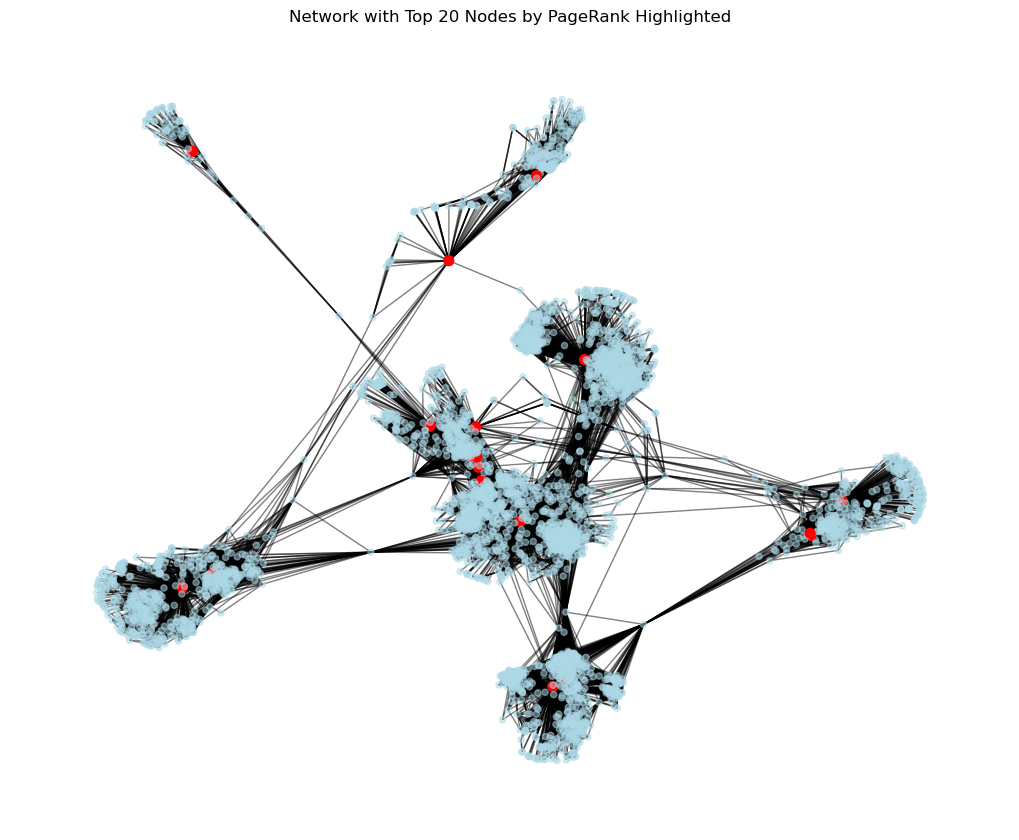

In [38]:
# Visualize top 20 nodes by PageRank
top_nodes_pagerank_viz = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:20]
top_nodes_pagerank_set = {node for node, _ in top_nodes_pagerank_viz}

plt.figure(figsize=(10,8))
nx.draw(graph, pos,
        node_color=['red' if node in top_nodes_pagerank_set else 'lightblue' for node in graph.nodes()],
        node_size=[50 if node in top_nodes_pagerank_set else 20 for node in graph.nodes()],
        with_labels=False,
        alpha=[1.0 if node in top_nodes_pagerank_set else 0.5 for node in graph.nodes()])

plt.title("Network with Top 20 Nodes by PageRank Highlighted")
plt.show()

In [54]:
# compare the two methods

li1 = list(np.argsort(eigenvector_centrality)[-100:])
li2 = list(node for node, _ in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:100])
common_nodes = set(li1) & set(li2) # get the common nodes

print(li1)
print(li2)
print(common_nodes)


[3423, 3084, 3467, 3250, 3136, 3203, 3336, 3141, 3260, 1490, 3097, 3478, 3268, 3025, 2989, 3104, 3401, 3032, 3461, 3270, 2984, 3034, 3382, 3253, 2994, 3295, 3071, 3273, 3241, 3283, 3437, 3252, 3360, 3103, 3197, 3365, 3236, 3079, 3234, 3299, 3080, 3133, 3449, 3048, 3310, 3200, 3411, 2167, 3209, 3433, 3457, 3456, 3238, 2976, 3024, 2944, 3125, 2962, 3091, 3438, 3110, 3235, 2964, 2154, 2966, 2993, 3429, 3142, 3407, 3135, 3068, 3443, 3439, 3445, 3264, 3431, 3222, 3044, 3441, 3101, 3159, 3053, 3066, 2995, 3165, 3242, 3175, 3370, 3178, 3296, 3002, 3096, 3058, 3157, 3106, 3338, 3169, 3146, 2145, 352]
[3437, 107, 1684, 0, 1912, 348, 686, 3980, 414, 698, 483, 3830, 376, 2047, 56, 25, 828, 322, 475, 428, 67, 3596, 2313, 713, 271, 563, 917, 119, 3545, 3938, 277, 1888, 1800, 3604, 21, 26, 705, 2543, 2951, 252, 412, 1352, 3101, 637, 1663, 3291, 3521, 1730, 122, 1086, 1431, 1783, 805, 3397, 373, 719, 517, 1584, 136, 2863, 3684, 2347, 2730, 3320, 239, 3082, 2742, 484, 2839, 1768, 353, 1199, 3280, 315,